In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opt_fair
import choix
import scipy.stats as stats


In [207]:
df = pd.read_csv('../../Data for BARP/data/law_data.csv')
df = df.drop(columns='Unnamed: 0')
df['sex'] = df['sex'] - 1
#now 1 is male 0 is female

In [208]:
df

,race,sex,LSAT,UGPA,region_first,ZFYA,sander_index,first_pf
0,White,0,39.0,3.1,GL,-0.98,0.782738,1.0
1,White,0,36.0,3.0,GL,0.09,0.735714,1.0
2,White,1,30.0,3.1,MS,-0.35,0.670238,1.0
3,Hispanic,1,39.0,2.2,NE,0.58,0.697024,1.0
4,White,0,37.0,3.4,GL,-1.26,0.786310,1.0
...,...,...,...,...,...,...,...,...
21786,White,1,33.0,4.0,SC,0.83,0.793452,1.0
21787,White,0,38.0,3.7,SC,-0.23,0.827381,0.0
21788,White,0,36.0,4.0,SC,2.12,0.830952,1.0
21789,White,1,31.0,2.9,SC,0.30,0.663690,1.0


In [209]:
df['b_race'] = df['race'].apply(lambda x: 0 if x == 'White' else 1)
#df['b_race'] = df['race'].apply(lambda x: 'White' if x == 'White' else 'Non-White')
df

,race,sex,LSAT,UGPA,region_first,ZFYA,sander_index,first_pf,b_race
0,White,0,39.0,3.1,GL,-0.98,0.782738,1.0,0
1,White,0,36.0,3.0,GL,0.09,0.735714,1.0,0
2,White,1,30.0,3.1,MS,-0.35,0.670238,1.0,0
3,Hispanic,1,39.0,2.2,NE,0.58,0.697024,1.0,1
4,White,0,37.0,3.4,GL,-1.26,0.786310,1.0,0
...,...,...,...,...,...,...,...,...,...
21786,White,1,33.0,4.0,SC,0.83,0.793452,1.0,0
21787,White,0,38.0,3.7,SC,-0.23,0.827381,0.0,0
21788,White,0,36.0,4.0,SC,2.12,0.830952,1.0,0
21789,White,1,31.0,2.9,SC,0.30,0.663690,1.0,0


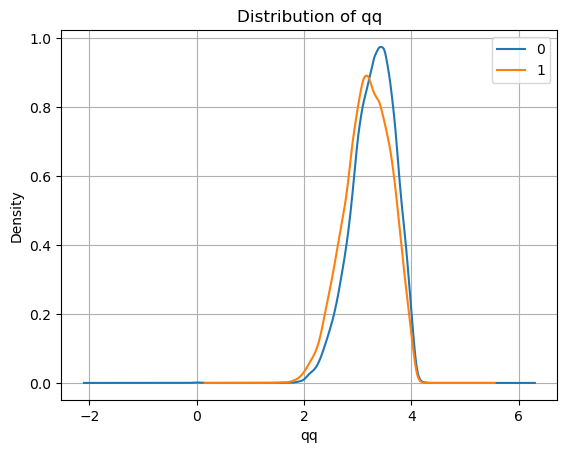

In [210]:
df.groupby('sex')['UGPA'].plot(kind = 'kde')
plt.title('Distribution of qq')
plt.xlabel('qq')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

In [211]:
total_count = len(df)
white_count = len(df[df['race'] == 'White'])
non_white_count = total_count - white_count

fraction_white = white_count / total_count
fraction_non_white = non_white_count / total_count

print("Fraction of White: {:.2f}".format(fraction_white))
print("Fraction of Non-White: {:.2f}".format(fraction_non_white))

Fraction of White: 0.84
Fraction of Non-White: 0.16


In [212]:
np.random.seed(101)
size = 1000
data = df.sample(n=size, random_state=42).reset_index(drop=True) 

In [213]:
data

,race,sex,LSAT,UGPA,region_first,ZFYA,sander_index,first_pf,b_race
0,White,0,42.0,3.0,FW,0.52,0.810714,1.0,0
1,White,0,38.0,3.2,FW,-0.59,0.779762,1.0,0
2,White,0,41.0,3.4,SC,-0.74,0.836310,0.0,0
3,Asian,0,40.0,3.2,GL,-0.40,0.804762,1.0,1
4,White,1,35.0,2.9,NE,0.80,0.713690,1.0,0
...,...,...,...,...,...,...,...,...,...
995,Other,0,39.0,3.9,NE,-0.11,0.858929,1.0,1
996,White,0,39.0,2.9,NG,0.27,0.763690,0.0,0
997,White,1,41.0,3.7,MS,-0.61,0.864881,1.0,0
998,White,1,45.0,3.6,GL,0.55,0.905357,1.0,0


In [214]:
%%time
indices = data.index.to_numpy()

# create an empty dictionary to store the pairs for each column
d = {}

for ind,col in enumerate(['LSAT', 'UGPA','ZFYA']):
    
    pairs = []
    while len(pairs) < 10000: #should a bit more than n log n
        i, j = np.random.choice(indices, size=2, replace=False)
        if ((i, j) not in pairs) and ((j, i) not in pairs):
            # check if the score of the current column for row i is greater than that of row j
            if data.loc[i, col] > data.loc[j, col]:
                pairs.append((i, j))
            
            # check if the score of the current column for row j is greater than that of row i
            elif data.loc[j, col] > data.loc[i, col]:
                pairs.append((j, i))
     # add the list of pairs to the dictionary for the current column
    d[ind] = pairs

d

CPU times: user 4.64 s, sys: 49.6 ms, total: 4.69 s
Wall time: 4.66 s


{0: [(298, 545),
  (834, 404),
  (813, 76),
  (133, 495),
  (37, 495),
  (182, 693),
  (55, 560),
  (59, 489),
  (701, 296),
  (587, 87),
  (722, 185),
  (224, 62),
  (5, 874),
  (152, 332),
  (192, 171),
  (178, 577),
  (980, 578),
  (995, 462),
  (987, 150),
  (615, 965),
  (801, 177),
  (617, 979),
  (250, 646),
  (556, 713),
  (24, 679),
  (488, 241),
  (250, 413),
  (242, 672),
  (804, 177),
  (748, 949),
  (338, 413),
  (712, 432),
  (143, 262),
  (266, 421),
  (138, 560),
  (748, 591),
  (506, 948),
  (869, 760),
  (553, 382),
  (199, 396),
  (418, 671),
  (877, 58),
  (720, 382),
  (198, 646),
  (489, 899),
  (370, 615),
  (704, 147),
  (62, 240),
  (88, 518),
  (822, 287),
  (338, 943),
  (819, 633),
  (158, 526),
  (281, 836),
  (839, 337),
  (587, 432),
  (191, 254),
  (515, 36),
  (447, 902),
  (244, 511),
  (182, 511),
  (843, 603),
  (398, 516),
  (456, 309),
  (533, 697),
  (808, 680),
  (363, 388),
  (47, 586),
  (131, 200),
  (436, 683),
  (307, 115),
  (759, 880),
  (

In [215]:
classes = data["sex"]

data_pc = opt_fair.Pairwise_with_rev(data = d, penalty = 0, classes = classes)

In [216]:
all_pc_data  = opt_fair._pc_without_reviewers(d)



In [217]:
%%time

estim = choix.opt_pairwise(size ,all_pc_data, alpha=0, method='Newton-CG', initial_params=None, max_iter=None, tol=1e-05)

CPU times: user 16.7 s, sys: 30.2 s, total: 47 s
Wall time: 6.17 s


In [218]:
#stats.kendalltau(estim,data['LSAT'])

In [219]:
%%time
A = opt_fair._matrix_of_comparisons(size,all_pc_data)
P = opt_fair._trans_prob(A)
rank_centrality_temp = np.log(opt_fair._stationary_dist(P))
stats.kendalltau(rank_centrality_temp,data['ZFYA'])

CPU times: user 7.31 s, sys: 1.18 s, total: 8.49 s
Wall time: 1.29 s


SignificanceResult(statistic=0.46018945352699303, pvalue=5.794599105378325e-105)

In [220]:
%%time

num_reviewers = 3
annot_bt_temp,annot_bias =  opt_fair._alternate_optim(size, num_reviewers, data_pc, iters = 101)

CPU times: user 4min 4s, sys: 4min 25s, total: 8min 29s
Wall time: 1min 58s


In [221]:
stats.kendalltau(annot_bt_temp,data['ZFYA'])

SignificanceResult(statistic=0.4729253203127644, pvalue=9.603340403491822e-111)

In [222]:
print(['LSAT', 'UGPA', 'ZFYA'])
annot_bias

['LSAT', 'UGPA', 'ZFYA']


array([ 0.24549982, -0.38959102,  0.17716035])

In [223]:
annot_bt_temp

array([ 5.72151280e-01, -3.27995454e-01,  1.03304452e-01, -2.45400482e-02,
       -5.03269112e-01,  7.59082198e-01, -5.02226600e-01,  1.64413068e+00,
        1.12731952e+00, -8.82039785e-01, -4.49358188e-01,  2.17841375e+00,
        5.99160467e-01,  1.60624402e+00,  5.78686568e-01, -2.95042199e-01,
       -5.02134589e-01, -1.31771587e+00, -9.39283786e-01, -2.88427766e+00,
        1.54722503e+00,  2.38309727e-01, -3.26103401e+00, -2.18945960e+00,
        3.06455293e+00,  1.07484714e+00, -1.29040416e+00,  5.35312720e+00,
       -3.15872750e+00, -2.07222072e-01, -1.84288128e+00, -4.93457847e-01,
       -4.72950025e-01,  1.56789423e+00,  1.82070148e-01,  1.48922502e+00,
       -4.29199571e-01,  6.21494074e-01,  6.06349510e-01, -1.67686148e-01,
        3.62250269e-02, -2.56973148e+00, -6.84413554e-01,  7.70673269e-01,
       -1.46129867e+00,  5.25029019e-02,  6.24873249e-01,  3.51789956e+00,
       -2.71206697e-01, -2.12968108e+00, -9.01232612e-01, -1.17731518e+00,
        1.19482450e+00,  

In [224]:
%%time
np.random.seed(99)
classes = data["b_race"]
data_pc_race = opt_fair.Pairwise_with_rev(data = d, penalty = 0, classes = classes)
num_reviewers = 3
annot_bt_race,annot_bias_race =  opt_fair._alternate_optim(size, num_reviewers, data_pc_race, iters = 100)

CPU times: user 4min 10s, sys: 4min 13s, total: 8min 23s
Wall time: 1min 56s


In [225]:
print(['LSAT', 'UGPA', 'ZFYA'])
annot_bias_race

['LSAT', 'UGPA', 'ZFYA']


array([-1.67658124, -0.81618366, -1.91082454])

/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Figure size 1200x1000 with 0 Axes>

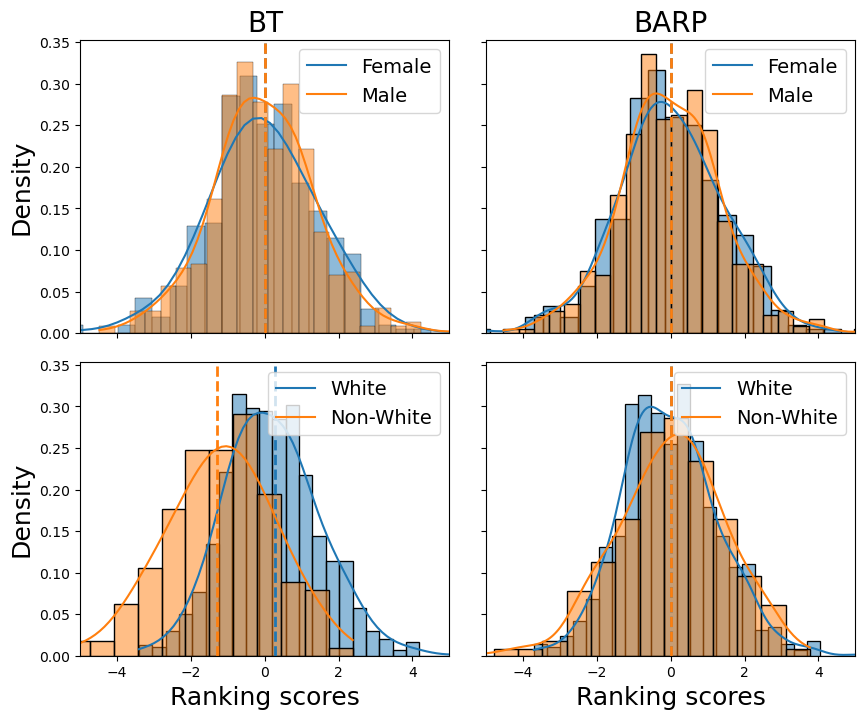

In [226]:
plt.figure(figsize=(12, 10))

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)




ax = axes[0, 0]

classes = data["sex"]
temp = {'Scores': estim, 'Class': classes}
hist = pd.DataFrame(temp)
unique_classes = hist['Class'].unique()
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i], ax=ax)
    
    mean_value = subset['Scores'].mean()
    ax.axvline(mean_value, color=color_palette[i], linestyle='dashed', linewidth=2,  label='_nolegend_')

ax.set_xlim(-5, 5)
ax.set_xlabel('Ranking scores', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
ax.set_title('BT', fontsize=20)
ax.legend(['Female', 'Male'], fontsize=14)

ax = axes[0, 1]

classes = data["sex"]
temp = {'Scores': annot_bt_temp, 'Class': classes}
hist = pd.DataFrame(temp)
unique_classes = hist['Class'].unique()
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i], ax=ax)
    
    # Add mean line
    mean_value = subset['Scores'].mean()
    ax.axvline(mean_value, color=color_palette[i], linestyle='dashed', linewidth=2,  label='_nolegend_')

ax.set_xlim(-5, 5)
ax.set_xlabel('Ranking scores', fontsize=18)
ax.set_ylabel('Density',fontsize=18)
ax.set_title('BARP', fontsize=20)
ax.legend(['Female', 'Male'], fontsize=14)


ax = axes[1, 0]

classes = data["b_race"]
temp = {'Scores': estim, 'Class': classes}
hist = pd.DataFrame(temp)
unique_classes = hist['Class'].unique()
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i], ax=ax)
    
    # Add mean line
    mean_value = subset['Scores'].mean()
    ax.axvline(mean_value, color=color_palette[i], linestyle='dashed', linewidth=2,  label='_nolegend_')

ax.set_xlim(-5, 5)
ax.set_xlabel('Ranking scores', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
#ax.set_title('Bradley Terry')
ax.legend(['White', 'Non-White'], fontsize=14,  loc='upper right')

ax = axes[1, 1]

classes = data["b_race"]
temp = {'Scores': annot_bt_race, 'Class': classes}
hist = pd.DataFrame(temp)
unique_classes = hist['Class'].unique()
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i], ax=ax)
    
    # Add mean line
    mean_value = subset['Scores'].mean()
    ax.axvline(mean_value, color=color_palette[i], linestyle='dashed', linewidth=2,  label='_nolegend_')
    

ax.set_xlim(-5, 5)
ax.set_xlabel('Ranking scores', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
#ax.set_title('BARP')
ax.legend(['White', 'Non-White'], fontsize=14)


plt.savefig("../plots/law_hist_current.pdf", bbox_inches="tight")

plt.show()

In [160]:
def exposure(x,classes):
    
    # Combine arrays as two columns
    result = np.column_stack((x, classes))

    # Shuffle the rows
    np.random.shuffle(result)

    # Order rows based on scores
    ordered_indices = np.argsort(result[:, 0])
    ordered_result = result[ordered_indices]
    
    g0 = 0
    g1 = 0

    for i,cl in enumerate(classes): #actully classes are in [:,1]
        if ordered_result[i,1] == 0:
            g0 += 1/(np.log2(i+2)+1)
            
        elif ordered_result[i,1] == 1:
            g1 += 1/(np.log2(i+2)+1)
    
    return  g1/np.count_nonzero(classes == 1)  - g0/np.count_nonzero(classes == 0) 

In [133]:

# Case 1: Bradley Terry - Sex
classes = data["sex"]
exposure_bt_sex = exposure(estim, classes)

# Case 2: BARP - Sex
classes = data["sex"]
exposure_barp_sex = exposure(annot_bt_temp, classes)

# Case 3: Bradley Terry - Race
classes = data["b_race"]
exposure_bt_race = exposure(estim, classes)

# Case 4: BARP - Race
classes = data["b_race"]
exposure_barp_race = exposure(annot_bt_race, classes)

print("Exposure - Bradley Terry (Sex):", exposure_bt_sex)
print("Exposure - BARP (Sex):", exposure_barp_sex)
print("Exposure - Bradley Terry (Race):", exposure_bt_race)
print("Exposure - BARP (Race):", exposure_barp_race)


Exposure - Bradley Terry (Sex): -0.00046947196717017636
Exposure - BARP (Sex): -0.0016959110024276913
Exposure - Bradley Terry (Race): 0.026686742532157928
Exposure - BARP (Race): 0.0033383151324134636


/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

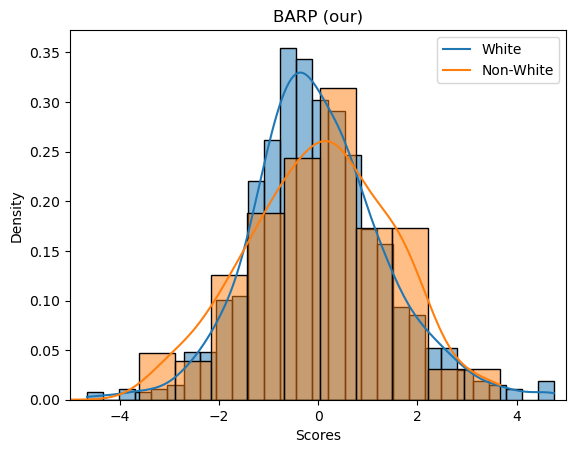

In [134]:
classes = data["b_race"]
# Create a DataFrame from the data
temp = {'Scores': annot_bt_race, 'Class': classes}
hist = pd.DataFrame(temp)

# Get unique classes
unique_classes = hist['Class'].unique()

# Define color palette for each class
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

# Plot separate histograms for each group with specified colors
for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i])

# Set xlim
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('BARP (our)')

# Display the legend
plt.legend(['White', 'Non-White'])

plt.savefig("../plots/law_barp_race.pdf", bbox_inches="tight")
# Display the plot
plt.show()

/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

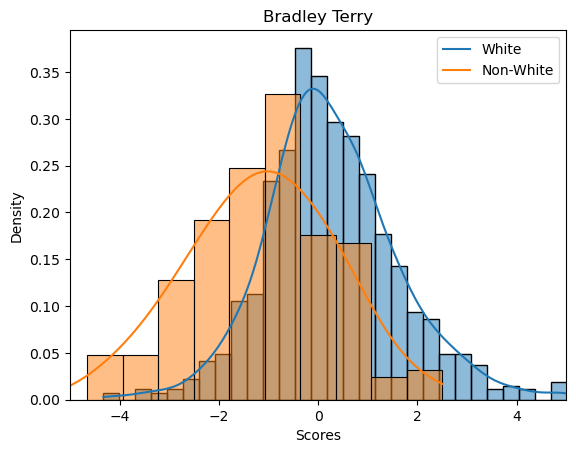

In [135]:
classes = data["b_race"]
# Create a DataFrame from the data
temp = {'Scores': estim, 'Class': classes}
hist = pd.DataFrame(temp)

# Get unique classes
unique_classes = hist['Class'].unique()

# Define color palette for each class
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

# Plot separate histograms for each group with specified colors
for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i])

# Set xlim
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Bradley Terry')

# Display the legend
plt.legend(['White', 'Non-White'])
plt.savefig("../plots/law_bt_race.pdf", bbox_inches="tight")

# Display the plot
plt.show()

/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

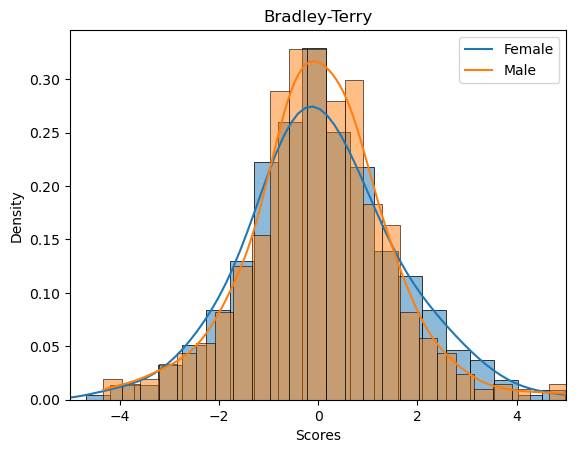

In [136]:
classes = data["sex"]
# Create a DataFrame from the data
temp = {'Scores': estim, 'Class': classes}
hist = pd.DataFrame(temp)

# Get unique classes
unique_classes = hist['Class'].unique()

# Define color palette for each class
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

# Plot separate histograms for each group with specified colors
for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i])

# Set xlim
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Bradley-Terry')

# Display the legend
plt.legend(['Female', 'Male'])

plt.savefig("../plots/law_bt_sex.pdf", bbox_inches="tight")
# Display the plot
plt.show()



/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

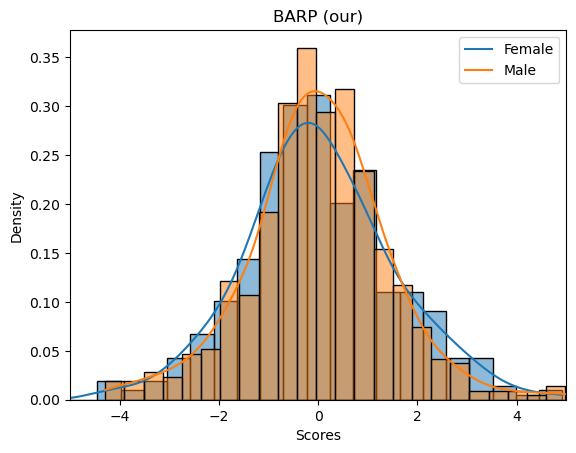

In [137]:
classes = data["sex"]
# Create a DataFrame from the data
temp = {'Scores': annot_bt_temp, 'Class': classes}
hist = pd.DataFrame(temp)

# Get unique classes
unique_classes = hist['Class'].unique()

# Define color palette for each class
color_palette = sns.color_palette("tab10", n_colors=len(unique_classes))

# Plot separate histograms for each group with specified colors
for i, cls in enumerate(unique_classes):
    subset = hist[hist['Class'] == cls]
    sns.histplot(data=subset, x='Scores', kde=True, label=cls, stat='density', color=color_palette[i])

# Set xlim
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('BARP (our)')

# Display the legend
plt.legend(['Female', 'Male'])

plt.savefig("../plots/law_barp_sex.pdf", bbox_inches="tight")

# Display the plot
plt.show()

In [138]:
classes

0      0
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    1
998    1
999    1
Name: sex, Length: 1000, dtype: int64

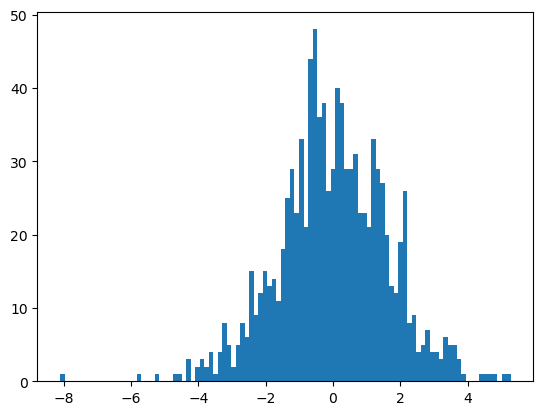

In [28]:
plt.hist(annot_bt_temp, bins=100)
plt.show()

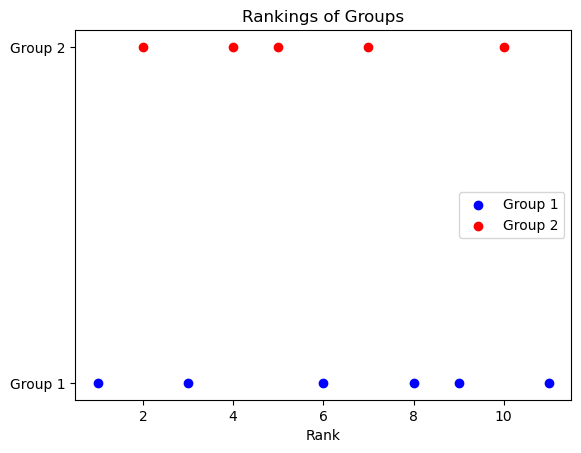

In [29]:
import matplotlib.pyplot as plt

# Define the ranks and groups
ranks = [1, 3, 6, 8, 9, 11]
group1 = [1, 3, 6, 8, 9, 11]
group2 = [rank for rank in range(1, max(ranks) + 1) if rank not in group1]

# Plot the rankings
plt.scatter(group1, [1] * len(group1), color='blue', label='Group 1')
plt.scatter(group2, [2] * len(group2), color='red', label='Group 2')

# Set plot attributes
plt.xlabel('Rank')
plt.yticks([1, 2], ['Group 1', 'Group 2'])
plt.title('Rankings of Groups')
plt.legend()

# Display the plot
plt.show()


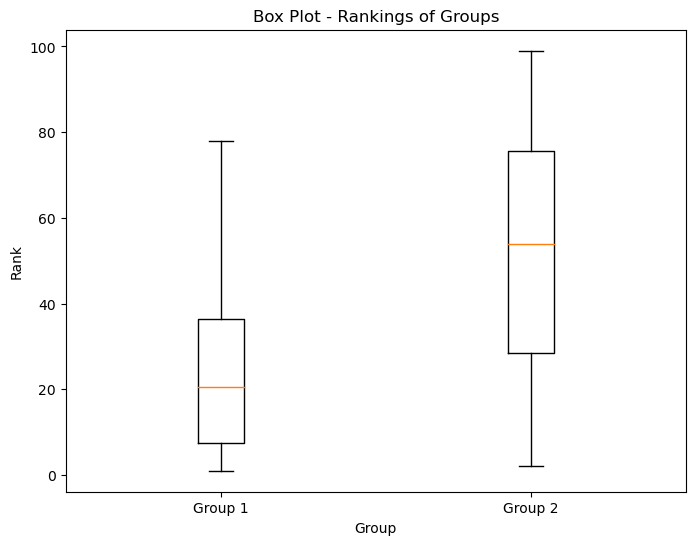

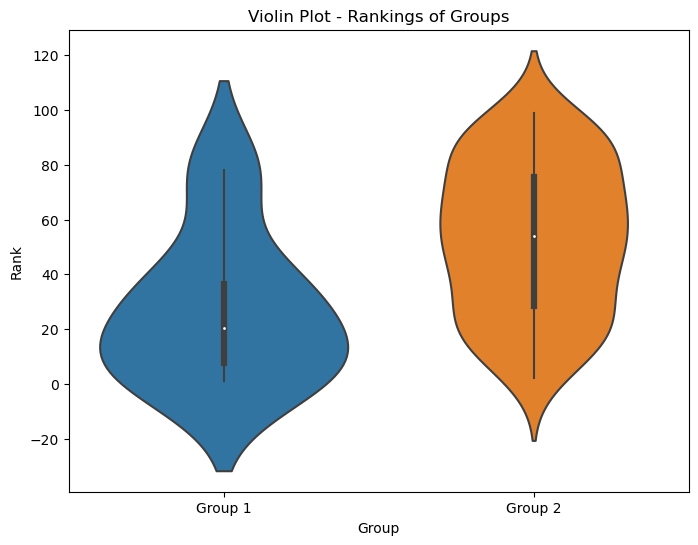

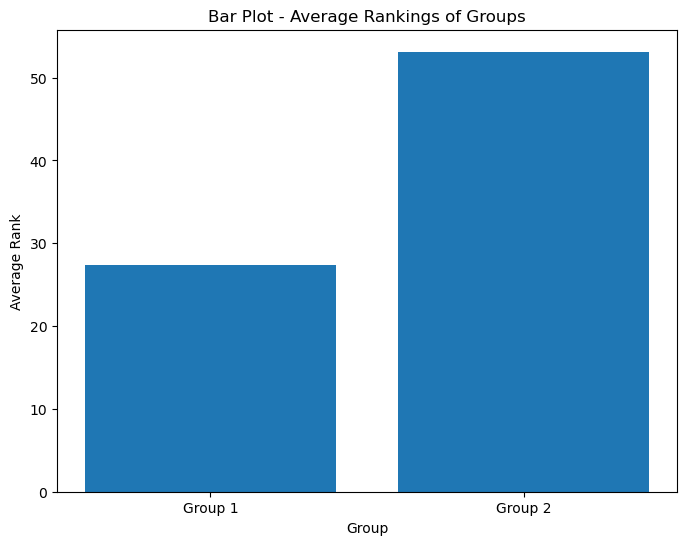

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the ranks and groups
# Define the ranks and groups
ranks = np.arange(1, 100)
group1 = [1, 3, 6, 8, 9, 11, 30, 31 ,36 ,38,77,78]
group2 = [rank for rank in ranks if rank not in group1]

# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2], labels=['Group 1', 'Group 2'])
plt.xlabel('Group')
plt.ylabel('Rank')
plt.title('Box Plot - Rankings of Groups')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=[group1, group2])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.xlabel('Group')
plt.ylabel('Rank')
plt.title('Violin Plot - Rankings of Groups')
plt.show()

# Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(['Group 1', 'Group 2'], [sum(group1) / len(group1), sum(group2) / len(group2)])
plt.xlabel('Group')
plt.ylabel('Average Rank')
plt.title('Bar Plot - Average Rankings of Groups')
plt.show()


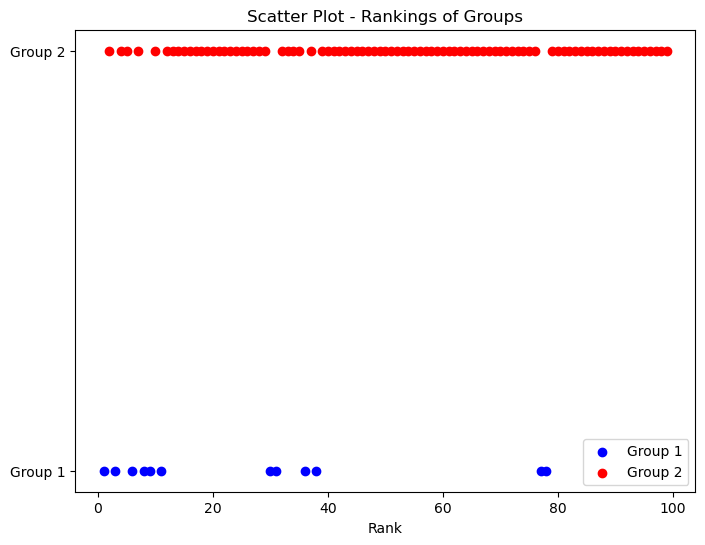

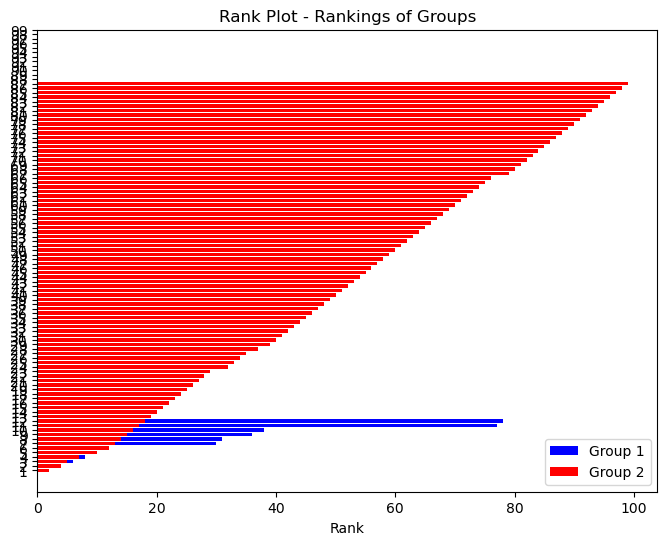

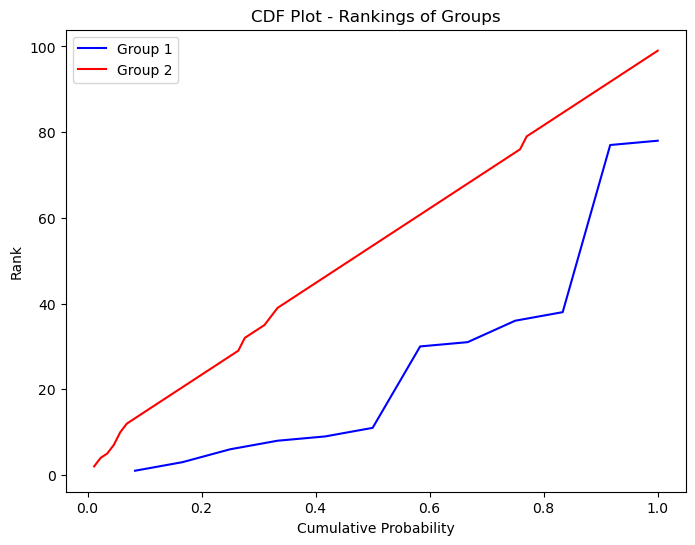

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the ranks and groups
# Define the ranks and groups
ranks = np.arange(1, 100)
group1 = [1, 3, 6, 8, 9, 11, 30, 31 ,36 ,38,77,78]
group2 = [rank for rank in ranks if rank not in group1]

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(group1, [1] * len(group1), color='blue', label='Group 1')
plt.scatter(group2, [2] * len(group2), color='red', label='Group 2')
plt.xlabel('Rank')
plt.yticks([1, 2], ['Group 1', 'Group 2'])
plt.title('Scatter Plot - Rankings of Groups')
plt.legend()
plt.show()

# Rank Plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(group1)), group1, color='blue', label='Group 1')
plt.barh(range(len(group2)), group2, color='red', label='Group 2')
plt.xlabel('Rank')
plt.yticks(range(len(ranks)), ranks)
plt.title('Rank Plot - Rankings of Groups')
plt.legend()
plt.show()

# Cumulative Distribution Function (CDF) Plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(group1) + 1) / len(group1), sorted(group1), color='blue', label='Group 1')
plt.plot(np.arange(1, len(group2) + 1) / len(group2), sorted(group2), color='red', label='Group 2')
plt.xlabel('Cumulative Probability')
plt.ylabel('Rank')
plt.title('CDF Plot - Rankings of Groups')
plt.legend()
plt.show()


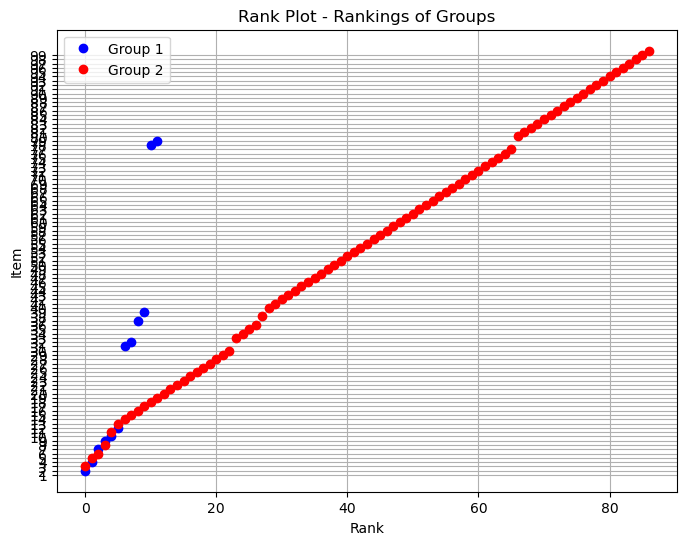

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranks and groups
ranks = np.arange(1, 100)
group1 = [1, 3, 6, 8, 9, 11, 30, 31 ,36 ,38,77,78]
group2 = [rank for rank in ranks if rank not in group1]

# Rank Plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(group1)), group1, 'o', color='blue', label='Group 1')
plt.plot( range(len(group2)), group2, 'o', color='red', label='Group 2')
plt.xlabel('Rank')
plt.ylabel('Item')
plt.yticks(np.arange(len(ranks)), ranks)
plt.title('Rank Plot - Rankings of Groups')
plt.legend()
plt.grid(True)
plt.show()


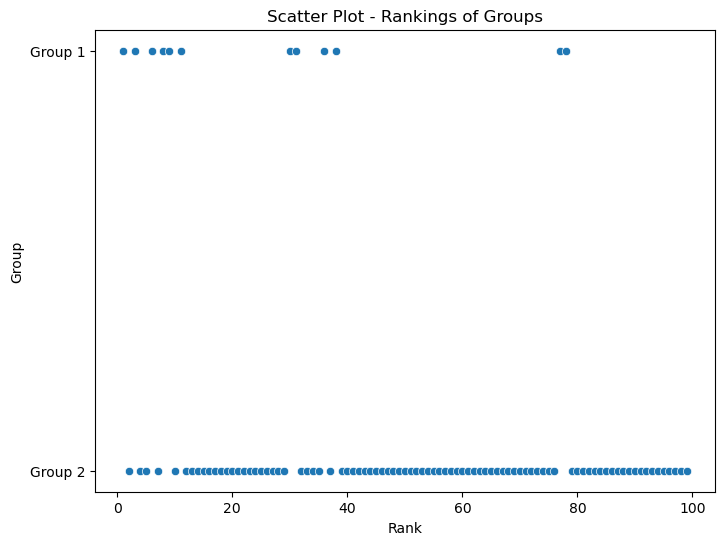

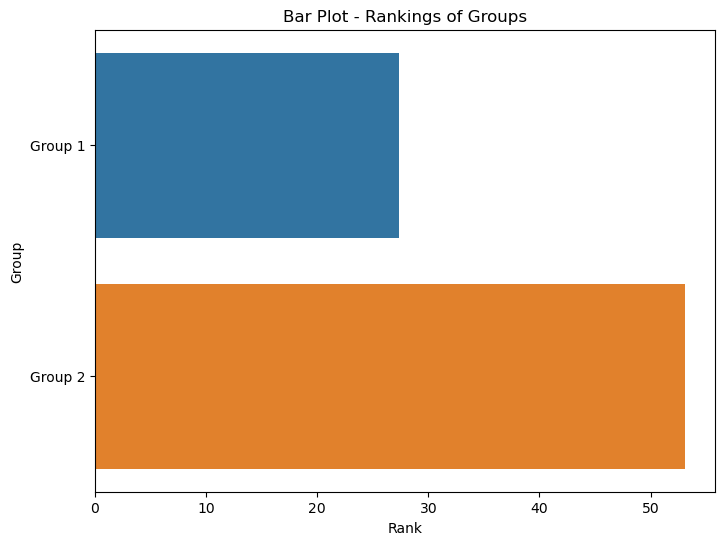

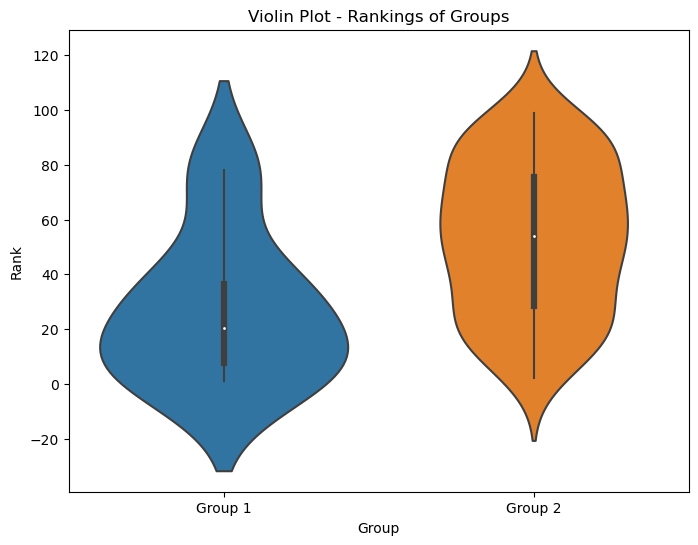

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with ranks and classes
data = pd.DataFrame({
    'Rank': ranks,
    'Group': ['Group 1' if rank in group1 else 'Group 2' for rank in ranks]
})

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Rank', y='Group')
plt.xlabel('Rank')
plt.ylabel('Group')
plt.title('Scatter Plot - Rankings of Groups')
plt.show()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Rank', y='Group', ci=None)
plt.xlabel('Rank')
plt.ylabel('Group')
plt.title('Bar Plot - Rankings of Groups')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Group', y='Rank')
plt.xlabel('Group')
plt.ylabel('Rank')
plt.title('Violin Plot - Rankings of Groups')
plt.show()


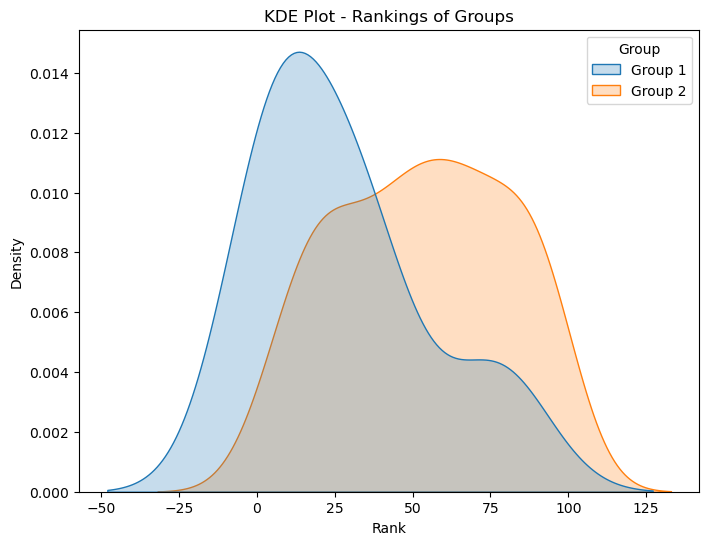

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with ranks and classes
data = pd.DataFrame({
    'Rank': ranks,
    'Group': ['Group 1' if rank in group1 else 'Group 2' for rank in ranks]
})

# KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Rank', hue='Group', fill=True, common_norm=False)
plt.xlabel('Rank')
plt.ylabel('Density')
plt.title('KDE Plot - Rankings of Groups')
plt.show()


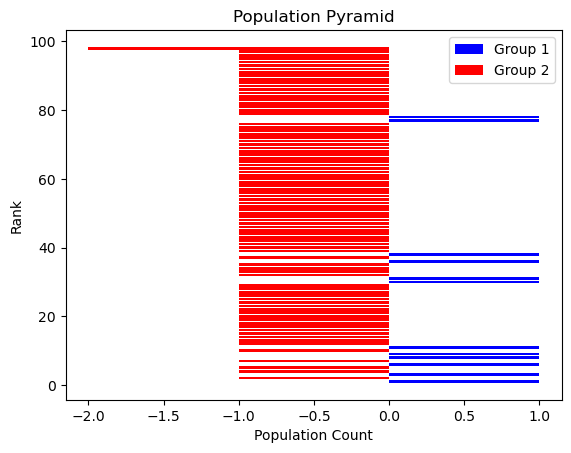

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranks and groups
ranks = np.arange(1, 100)
group1 = [1, 3, 6, 8, 9, 11, 30, 31, 36, 38, 77, 78]
group2 = [rank for rank in ranks if rank not in group1]

# Calculate the counts for each rank bin
bin_counts_group1, _ = np.histogram(group1, bins=ranks)
bin_counts_group2, _ = np.histogram(group2, bins=ranks)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the population pyramid
ax.barh(ranks[:-1], bin_counts_group1, align='center', color='blue', label='Group 1')
ax.barh(ranks[:-1], -bin_counts_group2, align='center', color='red', label='Group 2')

# Set axis labels and title
ax.set_xlabel('Population Count')
ax.set_ylabel('Rank')
ax.set_title('Population Pyramid')

# Add legend
ax.legend()

# Display the plot
plt.show()


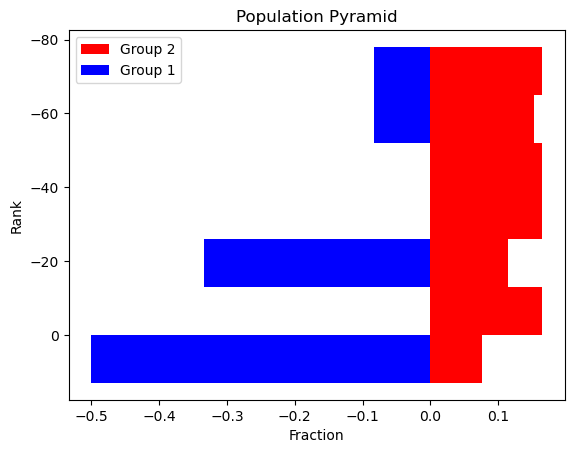

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranks and groups
ranks = np.arange(1, 100)
group1 = [1, 3, 6, 8, 9, 11, 30, 31, 36, 38, 77, 78]
group2 = [rank for rank in ranks if rank not in group1]

# Define the bin size
bin_size = 13

# Create the bins
bins = np.arange(0, len(ranks), bin_size)

# Calculate the counts for each bin
bin_counts_group1, _ = np.histogram(group1, bins=bins)
bin_counts_group2, _ = np.histogram(group2, bins=bins)

# Normalize the bin counts
total_count_group1 = np.sum(bin_counts_group1)
total_count_group2 = np.sum(bin_counts_group2)

normalized_counts_group1 = bin_counts_group1 / total_count_group1
normalized_counts_group2 = bin_counts_group2 / total_count_group2

# Create figure and axis
fig, ax = plt.subplots()

# Plot the population pyramid
ax.barh(-bins[:-1], normalized_counts_group2, height=bin_size, align='edge', color='red', label='Group 2')
ax.barh(-bins[:-1], -normalized_counts_group1, height=bin_size, align='edge', color='blue', label='Group 1')

# Set axis labels and title
ax.set_xlabel('Fraction')
ax.set_ylabel('Rank')
ax.set_title('Population Pyramid')

# Add legend
ax.legend()

# Invert the y-axis
ax.invert_yaxis()

# Display the plot
plt.show()


In [205]:
%%time
np.random.seed(42)

num_repetitions = 5
annot_bias_race_values = []

for _ in range(num_repetitions):
    classes = data["b_race"]
    data_pc_race = opt_fair.Pairwise_with_rev(data=d, penalty=0, classes=classes)
    num_reviewers = 3
    annot_bt_race, annot_bias_race = opt_fair._alternate_optim(size, num_reviewers, data_pc_race, iters=101)
    annot_bias_race_values.append(annot_bias_race)

# Compute mean and variance
mean_values = np.mean(annot_bias_race_values, axis=0)
variance_values = np.var(annot_bias_race_values, axis=0)

print("Mean values:", mean_values)
print("Variance values:", variance_values)


KeyboardInterrupt: 